<a href="https://colab.research.google.com/github/nan-park/section2_project/blob/main/project_section2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# **1. 미국 기준금리 및 그에 따른 경제지표 데이터**
- **연준 기준금리** us_fed_funds_rate.csv
- **원유 가격(WTI)** wti_crude_oil_prices.csv
- **소비자 물가지수(CPI)** us_consumer_price_index.csv
- **국채 금리(3년물)(GS3)** us_GS3.csv
- **실업률** us_national_unemployment_rate.csv
- **GDP** us_GDP.csv


In [3]:
from google.colab import files
files.upload();

Saving us_consumer_price_index.csv to us_consumer_price_index (1).csv
Saving us_fed_funds_rate.csv to us_fed_funds_rate (1).csv
Saving us_GDP.csv to us_GDP (1).csv
Saving us_GS3.csv to us_GS3 (1).csv
Saving us_national_unemployment_rate.csv to us_national_unemployment_rate (1).csv
Saving wti_crude_oil_prices.csv to wti_crude_oil_prices (1).csv


- 연준 기준금리

In [4]:
url = "us_fed_funds_rate.csv" # 미국 연준 기준금리 데이터(1954.07.01~)(historical)
fed_funds_rate = pd.read_csv(url, header=8)

In [5]:
# column 이름 변경 ' value' -> 'funds_rate'
fed_funds_rate.rename(columns={' value': 'funds_rate'}, inplace=True)

In [6]:
fed_funds_rate.head()

,date,funds_rate
0,1954-07-01,1.13
1,1954-07-02,1.25
2,1954-07-03,1.25
3,1954-07-04,1.25
4,1954-07-05,0.88


In [7]:
fed_funds_rate.shape

(24450, 2)

In [8]:
fed_funds_rate.isna().sum() # 결측치 존재

date           0
funds_rate    21
dtype: int64

In [9]:
fed_funds_rate[fed_funds_rate.funds_rate.isna()==True]  # 2022.09.23부터 자료 없음 -> 제거

,date,funds_rate
24429,2022-09-23,NaN
24430,2022-09-24,NaN
24431,2022-09-25,NaN
24432,2022-09-26,NaN
24433,2022-09-27,NaN
24434,2022-09-28,NaN
24435,2022-09-29,NaN
24436,2022-09-30,NaN
24437,2022-10-01,NaN
24438,2022-10-02,NaN


In [10]:
fed_funds_rate.head()

,date,funds_rate
0,1954-07-01,1.13
1,1954-07-02,1.25
2,1954-07-03,1.25
3,1954-07-04,1.25
4,1954-07-05,0.88


In [11]:
drop_index = fed_funds_rate[fed_funds_rate.funds_rate.isna()==True].index
fed_funds_rate = fed_funds_rate.drop(drop_index)
fed_funds_rate.isna().sum()

date          0
funds_rate    0
dtype: int64

In [12]:
# datetime으로 바꾸기
test_date = '2022-10-11'
datetime.strptime(test_date, '%Y-%m-%d')  # yyyy-MM-dd 형식

datetime.datetime(2022, 10, 11, 0, 0)

In [13]:
date_string = fed_funds_rate.date
kdate = [datetime.strptime(d, '%Y-%m-%d') for d in date_string]
fed_funds_rate.date = kdate
fed_funds_rate.set_index('date', inplace=True)  # index로 변경하기
fed_funds_rate.head()

,funds_rate
date,
1954-07-01,1.13
1954-07-02,1.25
1954-07-03,1.25
1954-07-04,1.25
1954-07-05,0.88


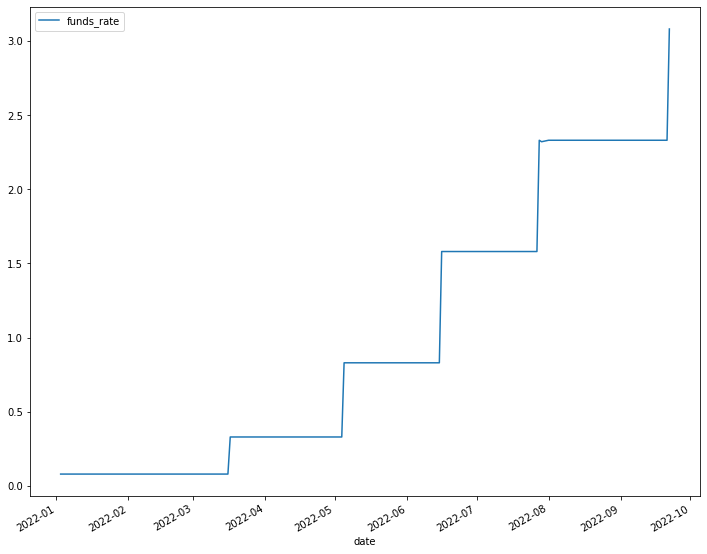

In [14]:
fed_funds_rate.loc['2022'].plot(figsize=(12, 10))
plt.show()

- 국제 유가(WTI) 

In [15]:
url = 'wti_crude_oil_prices.csv'  # 국제유가(1986.01.02~2022.09.19)
oil_price = pd.read_csv(url)

In [16]:
oil_price.head()

,DATE,DCOILWTICO
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


In [17]:
oil_price.columns

Index(['DATE', 'DCOILWTICO'], dtype='object')

In [18]:
# column 이름 바꾸기
oil_price.rename(columns={'DATE':'date', 'DCOILWTICO':'oil_price'}, inplace=True);

In [19]:
# datetime으로 바꾸기
date_string = oil_price.date
kdate = [datetime.strptime(d, '%Y-%m-%d') for d in date_string]
oil_price.date = kdate
oil_price.set_index('date', inplace=True)
oil_price.head()

,oil_price
date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87


In [20]:
oil_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9578 entries, 1986-01-02 to 2022-09-19
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   oil_price  9578 non-null   object
dtypes: object(1)
memory usage: 149.7+ KB


In [21]:
missing_index = oil_price[oil_price.oil_price=='.'].index # 결측치인 값 존재 -> 결측치로 간주하도록 nan으로 바꾸기
oil_price.loc[missing_index].head() # 327개

,oil_price
date,
1986-02-17,.
1986-03-28,.
1986-05-26,.
1986-07-04,.
1986-09-01,.


In [22]:
oil_price.loc[missing_index, 'oil_price'] = np.nan  # 결측치로 바꾸기
oil_price.oil_price = oil_price.oil_price.astype(float) # 나머지 float으로 바꾸기
oil_price.head()

,oil_price
date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87


In [23]:
oil_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9578 entries, 1986-01-02 to 2022-09-19
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   oil_price  9251 non-null   float64
dtypes: float64(1)
memory usage: 407.7 KB


In [24]:
oil_price = oil_price.interpolate(method='time')  # 시계열 기준으로 interpolate 보간
oil_price.loc[missing_index].head()

,oil_price
date,
1986-02-17,15.0325
1986-03-28,11.0750
1986-05-26,15.5625
1986-07-04,11.5700
1986-09-01,16.3050


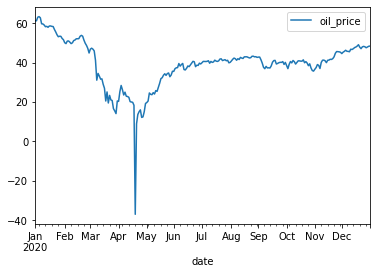

In [26]:
oil_price.loc['2020'].plot();

- 소비자 물가지수(CPI)

In [28]:
url = 'us_consumer_price_index.csv' # 소비자 물가지수(1960.01.01~2022.07.01 월별 데이터)(1960~2022)
cpi = pd.read_csv(url)
cpi.head()  # (체크) 나중에 일별 데이터를 월별 데이터로 바꿀 필요성이 있음

,DATE,CPALTT01USM659N
0,1960-01-01,1.034483
1,1960-02-01,1.730104
2,1960-03-01,1.730104
3,1960-04-01,1.724138
4,1960-05-01,1.724138


In [30]:
# columns 이름 바꾸기
cpi.rename(columns={'DATE':'date', 'CPALTT01USM659N':'CPI'}, inplace=True);

In [31]:
cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    751 non-null    object 
 1   CPI     751 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.9+ KB
